# Projeto de Machine Learning: Previsão de Popularidade Musical (2021–2023)
##### Disciplina: Tópicos Especiais II
##### Alunos: Daniela Maria Barbosa Faria
##### Professor: Ricardo Augusto da Silva Junior



## 🎯 Objetivo
Prever a **popularidade de músicas** usando características extraídas de faixas do Spotify, focando no período de **2021 a 2023**.

**Problema:** Dada uma nova música, quais são suas chances de sucesso com base em atributos como `energy`, `valence`, `danceability` etc?


## 📚 Etapas do Projeto
1. Análise Exploratória de Dados (EDA)
2. Pré-processamento
3. Treinamento do Modelo (Random Forest)
4. Avaliação e Conclusão


## 🛠️ Importação de Bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
sns.set(style='whitegrid')

## 📥 Carregamento e Preparação dos Dados (2021–2023)

In [5]:
df = pd.read_csv('playlist_2010to2023.csv', encoding='ISO-8859-1')
df = df[df['year'].between(2021, 2023)]
df = df.drop(['playlist_url', 'track_id', 'artist_id'], axis=1)
df = df.drop_duplicates()
df = df[~df['danceability'].isnull()]
df['duration_sec'] = df['duration_ms'] * 1e-3
df = df.drop(['duration_ms'], axis=1)
df.head()

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_sec
2100,2021,deja vu,16,deja vu,Olivia Rodrigo,['pop'],90,0.439,0.610,9,-7.236,1,0.1160,0.59300,0.000011,0.341,0.172,181.088,4,215.508
2101,2021,MONTERO (Call Me By Your Name),72,MONTERO (Call Me By Your Name),Lil Nas X,['lgbtq+ hip hop'],76,0.610,0.508,8,-6.682,0,0.1520,0.29700,0.000000,0.384,0.758,178.818,4,137.876
2102,2021,I WANNA BE YOUR SLAVE,83,Teatro d'ira - Vol. I,Måneskin,"['indie rock italiano', 'italian pop']",80,0.750,0.608,1,-4.008,1,0.0387,0.00165,0.000000,0.178,0.958,132.507,4,173.347
2103,2021,Good Days,81,Good Days,SZA,"['pop', 'r&b', 'rap']",91,0.436,0.655,1,-8.370,0,0.0583,0.49900,0.000008,0.688,0.412,121.002,4,279.204
2104,2021,drivers license,25,drivers license,Olivia Rodrigo,['pop'],90,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.105,0.132,143.874,4,242.014


## 📊 Análise Exploratória de Dados (EDA)

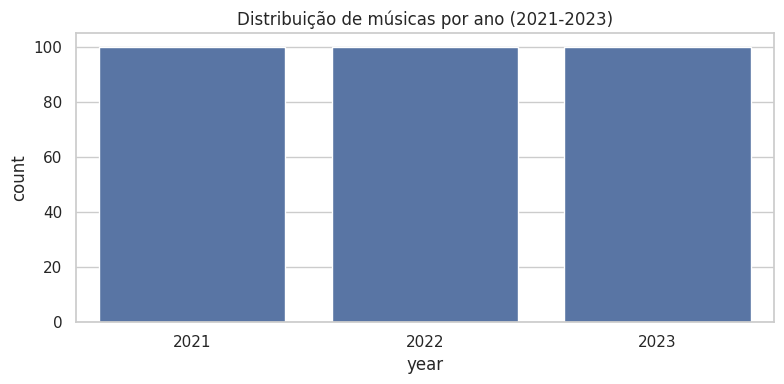

In [6]:
# Gráfico: Distribuição de músicas por ano
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='year')
plt.title('Distribuição de músicas por ano (2021-2023)')
plt.tight_layout()
plt.show()

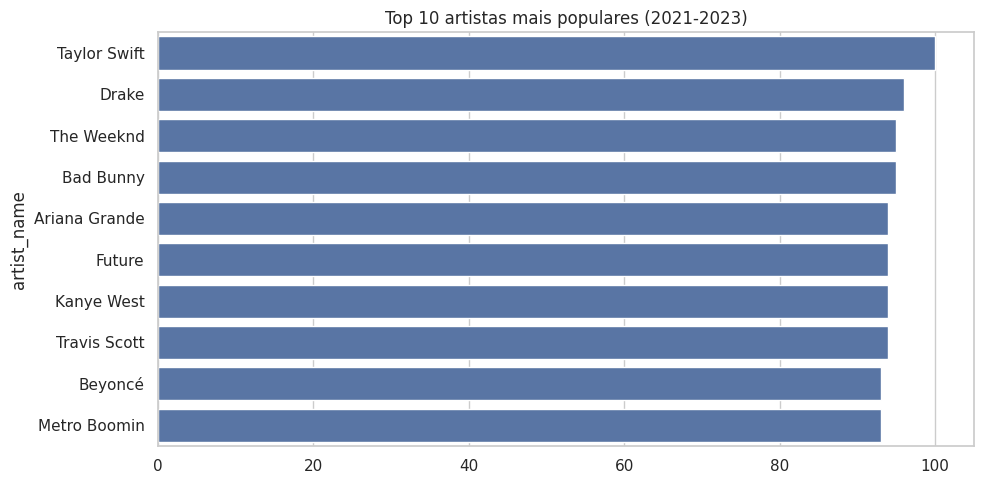

In [7]:
# Gráfico: Top 10 artistas mais populares
top_artists = df.groupby('artist_name')['artist_popularity'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title('Top 10 artistas mais populares (2021-2023)')
plt.tight_layout()
plt.show()

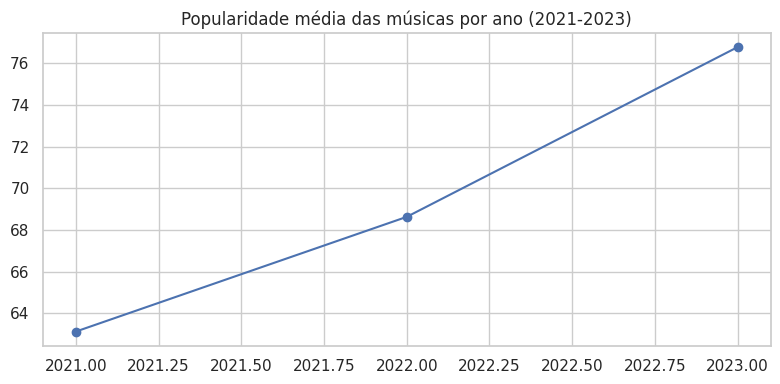

In [8]:
# Popularidade média por ano
pop_by_year = df.groupby('year')['track_popularity'].mean()
plt.figure(figsize=(8,4))
plt.plot(pop_by_year.index, pop_by_year.values, marker='o')
plt.title('Popularidade média das músicas por ano (2021-2023)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
import plotly.express as px
# Filtre as músicas de Ariana Grande e Taylor Swift
artists = ['Ariana Grande', 'Taylor Swift']
df_filtered = df[df['artist_name'].isin(artists)]

# Agrupe por ano e artista e conte o número de músicas
df_grouped = df_filtered.groupby(['year', 'artist_name']).size().unstack(fill_value=0)

# Resete o índice para ter o 'year' como uma coluna normal
df_grouped.reset_index(inplace=True)

# Crie o gráfico de linha
fig = px.line(df_grouped, x='year', y=artists, title='Número de músicas por ano')
fig.show()

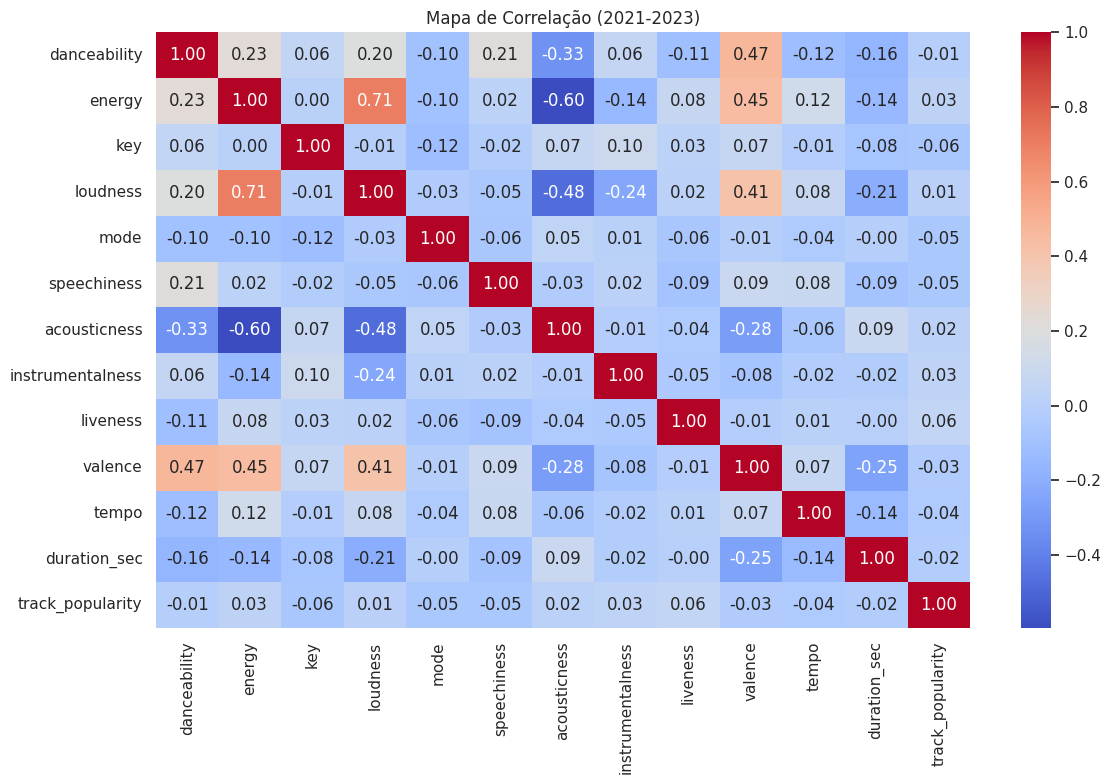

In [9]:
# Mapa de correlação
num_cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_sec', 'track_popularity']
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Correlação (2021-2023)')
plt.tight_layout()
plt.show()

In [15]:
## A quantidade de música do artista, para tirar a média
df_artist_tracks = df.groupby('artist_name')['track_name'].count().reset_index()
print(df.groupby('artist_name')['track_name'])
# Renomear a coluna para refletir o número de músicas
df_artist_tracks.columns = ['artist_name', 'num_tracks']

# Ordenar os dados por número de músicas em ordem decrescente para melhor visualização
df_artist_tracks = df_artist_tracks.sort_values(by='num_tracks', ascending=False).head(10)

# Criar o gráfico de barras
fig = px.bar(df_artist_tracks, x='artist_name', y='num_tracks', title='Quantidade de Músicas por Artista no Dataset', labels={'num_tracks': 'Número de Músicas', 'artist': 'Artista'})

# Exibir o gráfico
fig.show()

In [16]:
## Visualizar a popularidade das músicas mais populares.
import plotly.express as px
top_tracks = df.sort_values(by='track_popularity', ascending=False).head(10)

fig = px.bar(top_tracks, x='track_name', y='track_popularity' ,
             title='Top 10 Músicas Mais Populares',
             labels={'track_name': 'Track Name', 'track_popularity': 'Popularity'},
             color='artist_name', hover_data=['album', 'year'])
fig.show()

## 🤖 Modelagem:  Classificador de árvore de decisão


Acurácia: 0.5222222222222223
              precision    recall  f1-score   support

           0       0.52      0.70      0.60        46
           1       0.52      0.34      0.41        44

    accuracy                           0.52        90
   macro avg       0.52      0.52      0.50        90
weighted avg       0.52      0.52      0.51        90



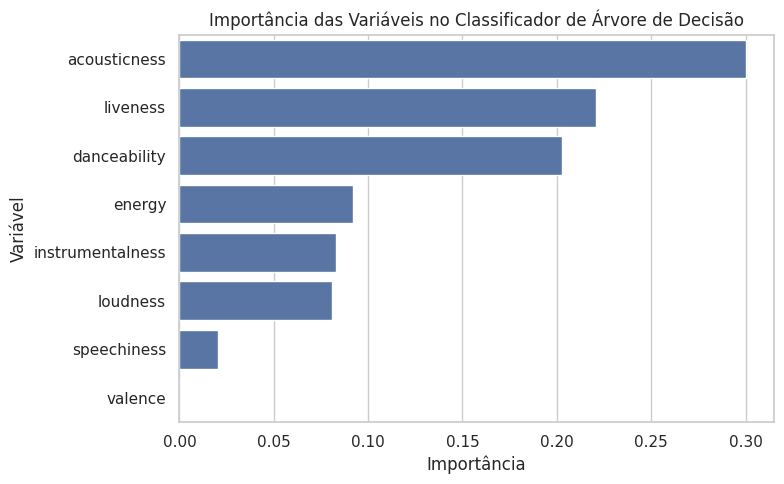

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Exemplo: transformar a popularidade em uma classificação (alta/baixa)
# Defina um limiar para popularidade alta (exemplo: acima da mediana)
threshold = df['track_popularity'].median()
df['popularity_class'] = (df['track_popularity'] >= threshold).astype(int)  # 1 = alta, 0 = baixa

features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence']
target = 'popularity_class'

df_model = df.dropna(subset=features + [target])
X = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o classificador de árvore de decisão
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Avaliação
y_pred = clf.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Importância das variáveis
importances = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=importances.values, y=importances.index)
plt.title('Importância das Variáveis no Classificador de Árvore de Decisão')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

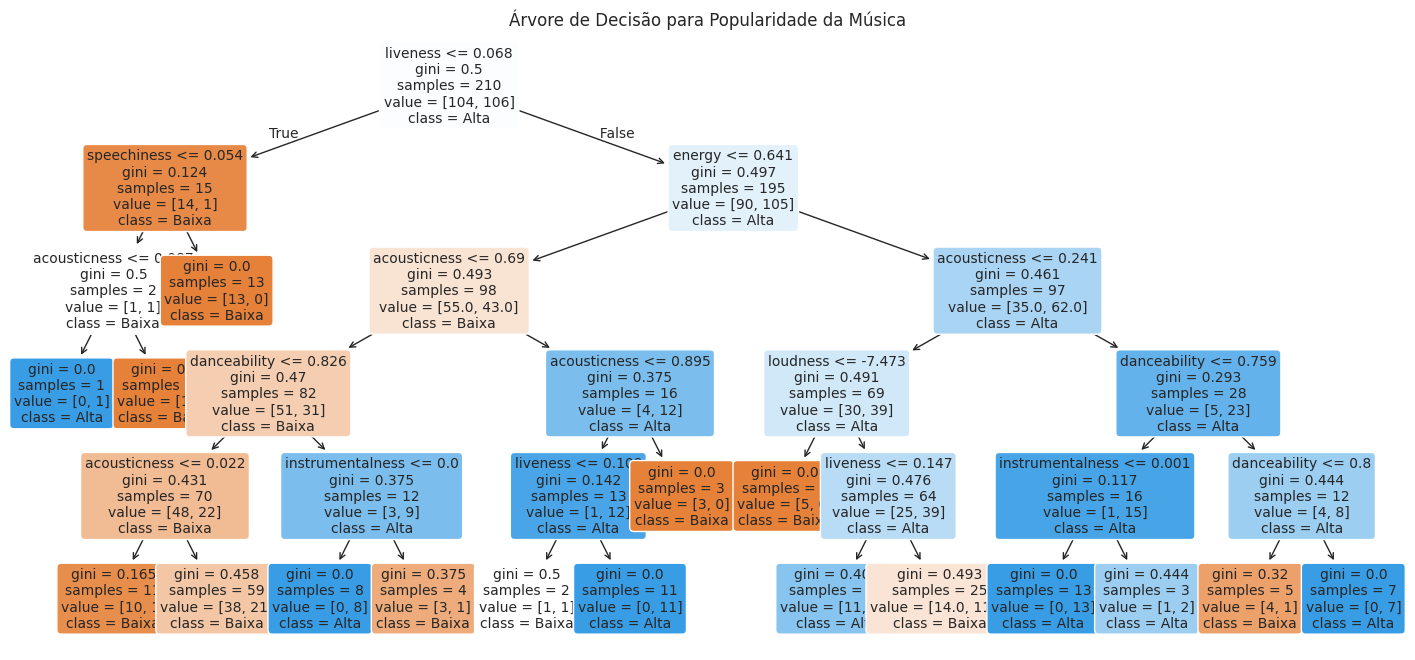

In [21]:
# Gráfico: Visualização da árvore de decisão
plt.figure(figsize=(18,8))
plot_tree(clf, feature_names=features, class_names=['Baixa', 'Alta'], filled=True, rounded=True, fontsize=10)
plt.title('Árvore de Decisão para Popularidade da Música')
plt.show()

## ✅ Conclusão
- A análise exploratória revelou padrões musicais recentes e os artistas de maior destaque.
- O modelo conseguiu prever popularidade com base em atributos como `danceability`, `energy` e `valence`.
- O RMSE e o R² mostraram desempenho razoável, útil para prever o sucesso potencial de novas músicas.